## Optimizers

1. Gradient Descent: Batch GD, Mini Batch GD, Sochastic GD
2. Momentum based GD
3. NAG
4. AdaGrad (Adaptive Gradient)
5. RMS Prop
6. ADAM (Adaptive Moment Estimation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
df = pd.read_csv('./data/Churn_Modelling.csv')

In [3]:
drop_cols = ['RowNumber','CustomerId','Surname']

df.drop(columns=drop_cols, inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [6]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Model Building

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 408
Trainable params: 408
Non-trainable params: 0
_________________________________________________________________


In [12]:
## Playing with different optimizers

In [15]:
optimizers = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0
    )

In [16]:
model.compile(loss='binary_crossentropy', optimizer=optimizers, metrics=['accuracy'])

In [17]:
history = model.fit(X_train_scaled,y_train, epochs=100, validation_split= 0.2)

Epoch 1/100


2023-05-12 21:14:15.264730: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


200/200 [==============================] - 0s 909us/step - loss: 0.5693 - accuracy: 0.7972 - val_loss: 0.5435 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 452us/step - loss: 0.5327 - accuracy: 0.7972 - val_loss: 0.5210 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 439us/step - loss: 0.5154 - accuracy: 0.7972 - val_loss: 0.5070 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 0s 441us/step - loss: 0.5042 - accuracy: 0.7972 - val_loss: 0.4971 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 0s 442us/step - loss: 0.4958 - accuracy: 0.7972 - val_loss: 0.4894 - val_accuracy: 0.7975
Epoch 6/100
200/200 [==============================] - 0s 427us/step - loss: 0.4887 - accuracy: 0.7972 - val_loss: 0.4823 - val_accuracy: 0.7975
Epoch 7/100
200/200 [==============================] - 0s 429us/step - loss: 0.4822 - accuracy: 0.7972 - val_loss: 0.4757 - val_accuracy: 0.79

In [18]:
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log > 0.5, 1, 0)


from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

63/63 [==============================] - 0s 336us/step


0.862

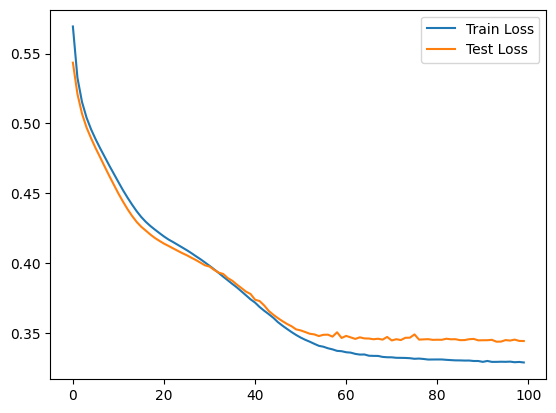

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label = 'Train Loss')
plt.plot(history.history['val_loss'], label= 'Test Loss')
plt.legend()

### Momentum Based

63/63 [==============================] - 0s 325us/step
0.8515


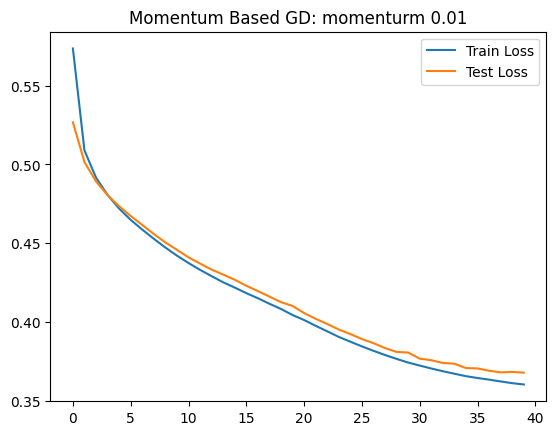

63/63 [==============================] - 0s 305us/step
0.859


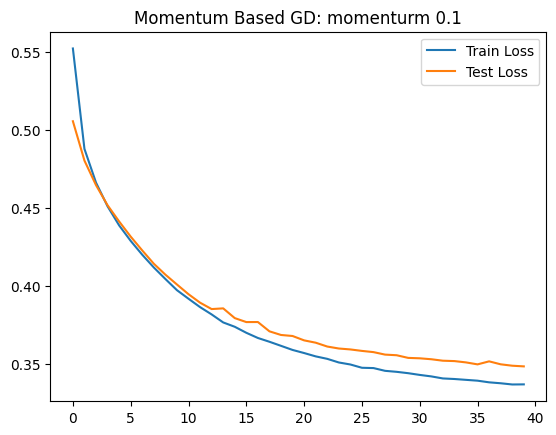

63/63 [==============================] - 0s 319us/step
0.857


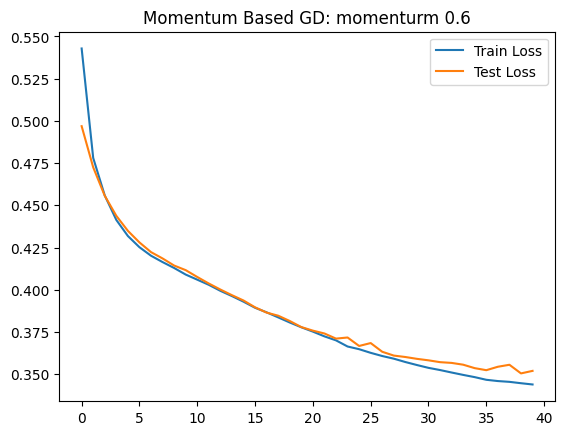

63/63 [==============================] - 0s 318us/step
0.8605


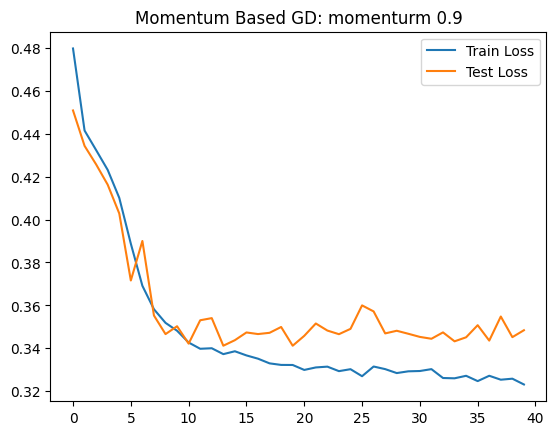

63/63 [==============================] - 0s 303us/step
0.854


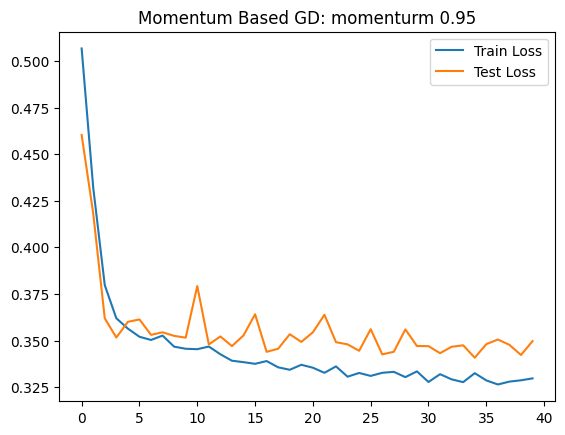

63/63 [==============================] - 0s 307us/step
0.8395


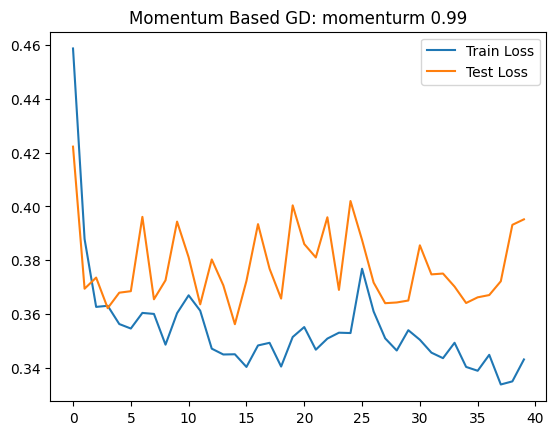

In [33]:
def momemtum_based_gd(lr, m):
    """
    This function trains the model and print the accuracy and loss plot
    Input: Learining rate: 'Default value is  0.01'
           Momentum Value: 'Higher value means less weighted to past values'
    """
    model = Sequential()
    model.add(Dense(11, activation = 'relu', input_dim = 11))
    model.add(Dense(11,activation = 'relu'))
    model.add(Dense(11, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))


    optimizers = tf.keras.optimizers.SGD(
        learning_rate=lr,
        momentum=m
        )

    model.compile(loss='binary_crossentropy', optimizer=optimizers, metrics=['accuracy'])

    history = model.fit(X_train_scaled,y_train, epochs=40, validation_split= 0.2, verbose=False)

    y_log = model.predict(X_test_scaled)
    y_pred = np.where(y_log > 0.5, 1, 0)

    print(accuracy_score(y_test,y_pred))


    plt.title(f'Momentum Based GD: momenturm {m}')
    plt.plot(history.history['loss'],label = 'Train Loss')
    plt.plot(history.history['val_loss'], label= 'Test Loss')
    plt.legend()
    plt.show()


## Driver code

m = [0.01,0.10,0.60,0.90,0.95,0.99]

for i in m:
    momemtum_based_gd(lr = 0.01, m = i)


### RMS Propagation

63/63 [==============================] - 0s 309us/step
0.852


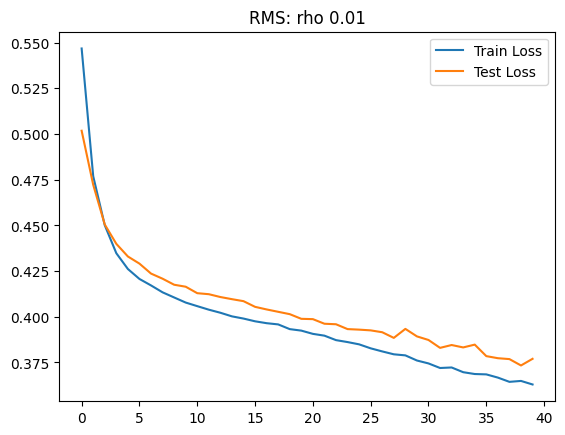

63/63 [==============================] - 0s 321us/step
0.8565


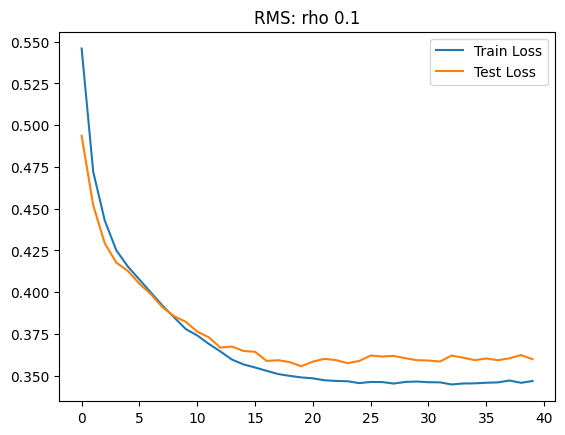

63/63 [==============================] - 0s 304us/step
0.8615


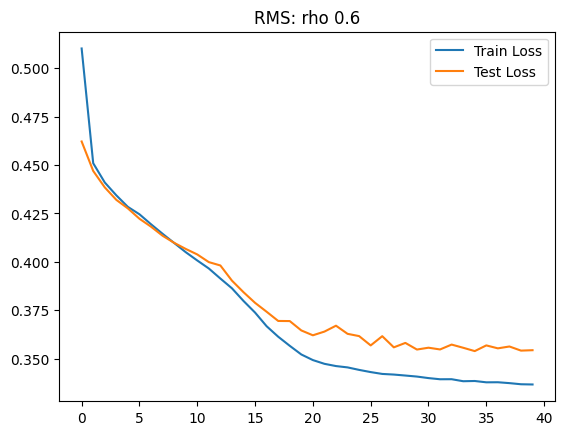

63/63 [==============================] - 0s 311us/step
0.8675


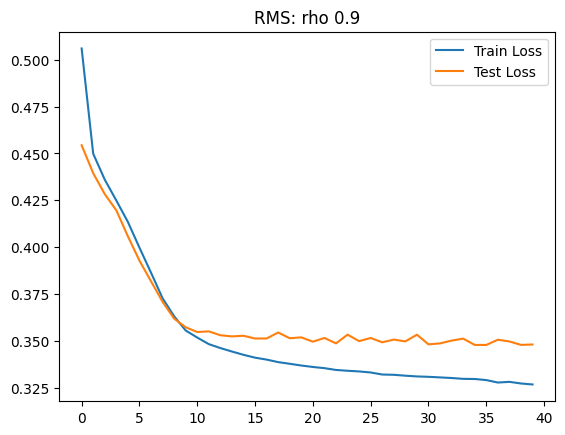

63/63 [==============================] - 0s 316us/step
0.864


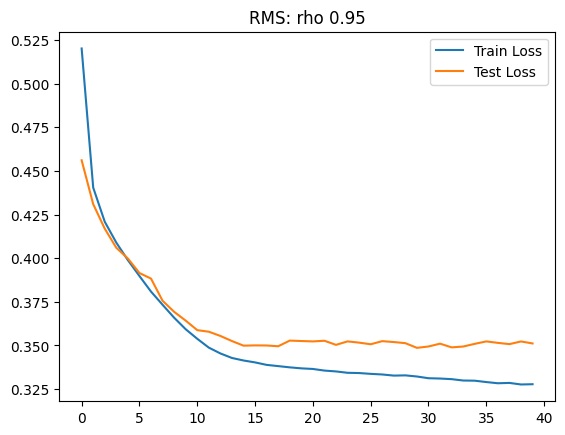

63/63 [==============================] - 0s 314us/step
0.863


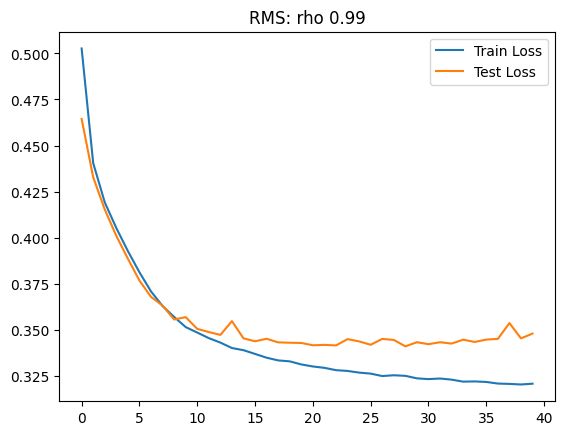

In [36]:
def rms_prop(lr, rho):
    """
    This function trains the model and print the accuracy and loss plot
    Input: Learining rate: 'Default value is  0.01'
           Momentum Value: 'Higher value means less weighted to past values'
    """
    model = Sequential()
    model.add(Dense(11, activation = 'relu', input_dim = 11))
    model.add(Dense(11,activation = 'relu'))
    model.add(Dense(11, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))


    optimizers = tf.keras.optimizers.RMSprop(
                learning_rate=lr,
                rho=rho,
                momentum=0.0,
                epsilon=1e-07,
                centered=False,
                weight_decay=None,
                clipnorm=None,
                clipvalue=None,
                global_clipnorm=None,
                use_ema=False,
                ema_momentum=0.99,
                ema_overwrite_frequency=100,
                jit_compile=True,
                name="RMSprop"
            )

    model.compile(loss='binary_crossentropy', optimizer=optimizers, metrics=['accuracy'])

    history = model.fit(X_train_scaled,y_train, epochs=40, validation_split= 0.2, verbose=False)

    y_log = model.predict(X_test_scaled)
    y_pred = np.where(y_log > 0.5, 1, 0)

    print(accuracy_score(y_test,y_pred))


    plt.title(f'RMS: rho {rho}')
    plt.plot(history.history['loss'],label = 'Train Loss')
    plt.plot(history.history['val_loss'], label= 'Test Loss')
    plt.legend()
    plt.show()


## Driver code

rho = [0.01,0.10,0.60,0.90,0.95,0.99]

for i in rho:
    rms_prop(lr = 0.001, rho = i)


### ADAM

63/63 [==============================] - 0s 319us/step
0.858


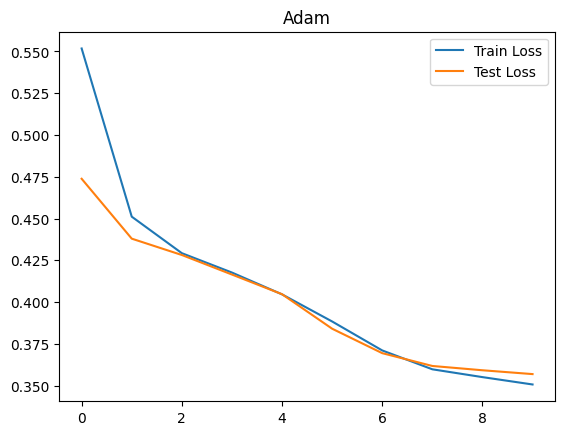

In [38]:
def adam():
    """
    This function trains the model and print the accuracy and loss plot
    Input: Learining rate: 'Default value is  0.01'
           Momentum Value: 'Higher value means less weighted to past values'
    """
    model = Sequential()
    model.add(Dense(11, activation = 'relu', input_dim = 11))
    model.add(Dense(11,activation = 'relu'))
    model.add(Dense(11, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))


    optimizers = tf.keras.optimizers.Adam(
                                        learning_rate=0.001,
                                        beta_1=0.9,
                                        beta_2=0.999,
                                        epsilon=1e-07
                                        )

    model.compile(loss='binary_crossentropy', optimizer=optimizers, metrics=['accuracy'])

    history = model.fit(X_train_scaled,y_train, epochs=10, validation_split= 0.2, verbose=False)

    y_log = model.predict(X_test_scaled)
    y_pred = np.where(y_log > 0.5, 1, 0)

    print(accuracy_score(y_test,y_pred))


    plt.title(f'Adam')
    plt.plot(history.history['loss'],label = 'Train Loss')
    plt.plot(history.history['val_loss'], label= 'Test Loss')
    plt.legend()
    plt.show()


## Driver code

adam()





## Test with another dataset

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


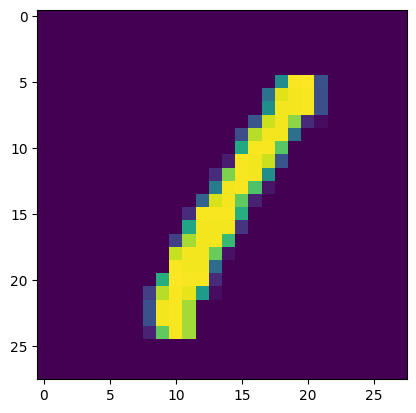

In [6]:
plt.imshow(x_train[3])

In [7]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test=  x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
y_train=keras.utils.to_categorical(y_train)#,num_classes=)
y_test=keras.utils.to_categorical(y_test)#, num_classes)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /=255

In [9]:
## Building the model
batch_size=64
num_classes=10
epochs=10

def build_model(optimizer):

    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])

    return model

In [70]:
## Training the Model
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
loss = []
val_loss = []
name = []

for i in optimizers:
		model = build_model(i)
		hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test,y_test))
		loss.extend(hist.history['loss'])
		val_loss.extend(hist.history['val_loss'])
		name.extend([i] * epochs)


In [72]:
train_history = pd.DataFrame({'name':name,
              'loss':loss,
              'val_loss':val_loss
              })

In [76]:
train_history[train_history['name'] == 'Adam']

,name,loss,val_loss
20,Adam,0.231970,0.101764
21,Adam,0.115727,0.077089
22,Adam,0.108432,0.077952
23,Adam,0.119079,0.088890
24,Adam,0.137691,0.093868
25,Adam,0.163999,0.105138
26,Adam,0.213897,0.135151
27,Adam,0.269668,0.193401
28,Adam,0.344688,0.187293
29,Adam,0.450891,0.332316


<Axes: ylabel='val_loss'>

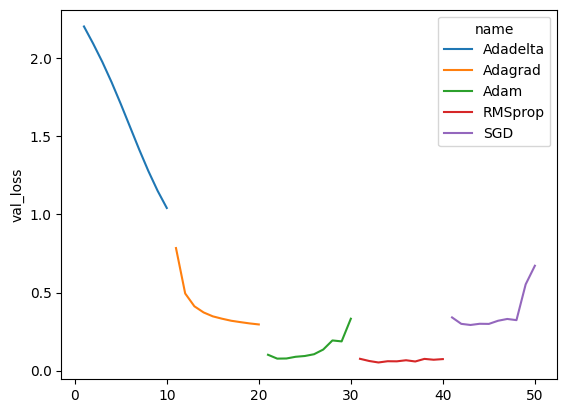

In [93]:
sns.lineplot(data=train_history,
             hue='name',
             x=np.arange(1,51),
             y='val_loss')